# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 4: Algoritmos de regresión.
.

***
## Instrucciones Generales:
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos lo códigos computacionales,

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas anteriores del curso, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

En la **Tarea 2**, se realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

En la **Tarea 3**, se desarrolló el análisis exploratorio  sobre una base de datos más extensa, incluyendo información de salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

En esta **Tarea 4 y final**, ud. entrenará y validará un modelo predictivo de salarios de puestos de trabajos en Ciencia de Datos en Sudamérica.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: dos años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados, no los utilice para ninguna toma de decisión real.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv')


### Para recordar el análisis exploratorio de datos, considere los siguientes gráficos:

<Figure size 1000x500 with 0 Axes>

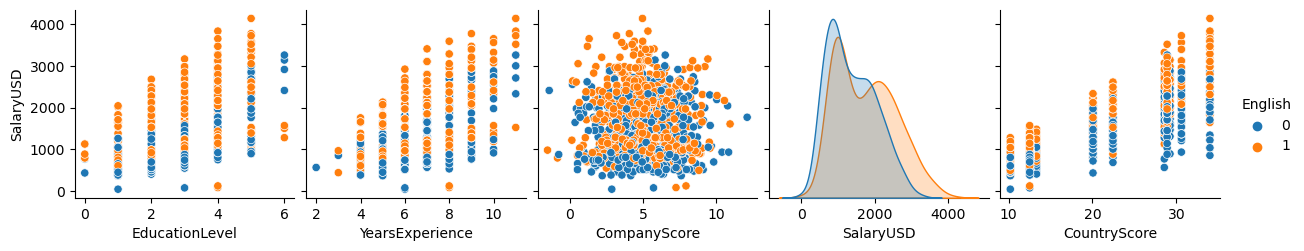

In [ ]:
fig=plt.figure(figsize=(10,5));
sns.pairplot(data=df,y_vars='SalaryUSD',hue='English');

### 1. Entrenamiento y validación de modelos de regresión lineal. [6 puntos]

Considere las siguientes variables del dataset:[`English`,`EducationLevel`, `YearsExperience`,`CompanyScore`,`CountryScore`].

**a)** Utilizando la librería `sklearn`, entrene al menos 3 modelos de regresión lineal para predecir la variable `SalaryUSD`, utilizando *distintas combinaciones* de variables predictoras.<br>

Para el entrenamiento de modelos de regresión,
* Defina la matriz de variables predictoras ($X$) y el vector objetivo ($y$).
* Separe los datos en conjuntos de entrenamiento y prueba, con una proporción 70%-30%.<br>
* Recuerde estandarizar las variables predictoras.<br>


**b**) Para cada uno de los modelos entrenados, calcule las métricas de desempeño ($R^2$,RMSE) para los datasets de entrenamiento y de prueba, compare y argumente: ¿cuál combinación de variables permite obtener el mejor modelo predictivo para `SalaryUSD`?

* Note que `RMSE=np.sqrt(mean_squared_error)`


**c)** Utilice el *mejor* modelo entrenado en la parte **b)**, para realizar predicciones para nuevos datos: estime el salario en USD esperado para un puesto de trabajo con las siguientes características:

`English`=1,`EducationLevel`=6,`YearsExperience`=2,`CompanyScore`=7.5,`CountryScore`=34.0 (es decir, un cientista de datos con postgrado, 2 años de experiencia laboral, en una compñía con ranking 7.5, en Chile).

* Nota: recuerde que estos datos han sido parcialmente simulados, por lo que no reflejan necesariamente la realidad del mecardo laboral.

# Respuesta

### a) Se definen 3 combinaciones de variables predictoras y se construye las regresiones

Definimos una función que estandariza y construye el set de entrenamiento y set de prueba para utilizar en la regresion. Luego, una función que crea la regresión.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
def get_train_test_split(X, y):
    '''
    Función que construye el set de entrenamiento y de pruebas
    '''
    # Se obtiene el set de entrenamiento y test en proporción 70:30
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=66)

    # Se estandarizan las variables predictoras
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)

    return(X_train_sc, X_test_sc, y_train, y_test, scaler)

def fit_linear_regression(X_train, y_train):
    '''
    Función que crea el Regresor por medio de una regresión lineal
    '''
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg



Creamos las combinaciones y posteriormente, sus respectivas regresiones

In [63]:
# Vemos ordenadamente las correlaciones entre cada variable predictora y nuestro target SalaryUSD
df.corr(numeric_only=True)['SalaryUSD'].sort_values(ascending=False)

# Primera combinacion: las 3 mejoras variables con correlacion (CountryScore, EducationLevel, YearsExperience)
features_comb_1 = ['CountryScore', 'EducationLevel', 'YearsExperience']
X_1 = df[features_comb_1].values

# Segunda combinación: Igual que la primera combinación pero agregamos la variable binaria English
features_comb_2 = ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']
X_2 = df[features_comb_2].values

# Tercera combinación: consideraremos la variable con mayor y la con menor correlación respecto al target SalaryUSD
features_comb_3 = ['CountryScore', 'CompanyScore']
X_3 = df[features_comb_3].values

# Definimos el target
y = df.SalaryUSD.values

Entrenamos las regresiones para cada combinación

In [64]:
# Definimos los set de entrenamiento y de prueba para cada combinacion
X_train_1, X_test_1, y_train_1, y_test_1, scaler_1 = get_train_test_split(X_1, y)
X_train_2, X_test_2, y_train_2, y_test_2, scaler_2 = get_train_test_split(X_2, y)
X_train_3, X_test_3, y_train_3, y_test_3, scaler_3 = get_train_test_split(X_3, y)

# Creamos las regresiones lineales para las 3 combinaciones
reg_1 = fit_linear_regression(X_train_1, y_train_1)
reg_2 = fit_linear_regression(X_train_2, y_train_2)
reg_3 = fit_linear_regression(X_train_3, y_train_3)

### b) Calculamos las métricas de performance R2 y RMSE para cada regresion

Creamos una función que calcula los errores cuadráticos y una función similar para R2.

In [86]:
def get_reg_rmse(reg, comb, X_train, X_test, y_train, y_test, model_name='Regresión lineal'):
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'{model_name} con combinación de variables {comb}:  RMSE (train)={rmse_train}')
    print(f'{model_name} con combinación de variables {comb}:  RMSE (test)={rmse_test}')

In [87]:
def get_reg_R2(reg, comb, X_train, X_test, y_train, y_test, model_name='Regresión lineal'):
    r2_train = reg.score(X_train, y_train)
    r2_test = reg.score(X_test, y_test)

    print(f'{model_name} con combinación de variables {comb}:  R^2 (train)={r2_train}')
    print(f'{model_name} con combinación de variables {comb}:  R^2 (test)={r2_test}')

Procedemos a utilizar estas funciones en nuestras tres combinaciones de features predictoras

In [88]:
# Combinación 1
get_reg_rmse(reg_1, features_comb_1, X_train_1, X_test_1, y_train_1, y_test_1)
get_reg_R2(reg_1, features_comb_1, X_train_1, X_test_1, y_train_1, y_test_1)
print()

# Combinación 2
get_reg_rmse(reg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2)
get_reg_R2(reg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2)
print()

# Combinación 3
get_reg_rmse(reg_3, features_comb_3, X_train_3, X_test_3, y_train_3, y_test_3)
get_reg_R2(reg_3, features_comb_3, X_train_3, X_test_3, y_train_3, y_test_3)

Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience']:  RMSE (train)=259.89939849485694
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience']:  RMSE (test)=240.49021276645354
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience']:  R^2 (train)=0.8809722668301149
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience']:  R^2 (test)=0.9013331493671135

Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=175.56770661995918
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=149.916792892369
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9456841117360162
Regresión lineal con combinación de 

Viendo este resultado, podemos descartar de plano la tercera combinación de ['CountryScore', 'CompanyScore'], dado que tanto el error cuadrático medio del set de entrenamiento como el del set de pruebas está muy por encima que el de los otros dos dataset con las otras combinaciones. 

Por otra parte, vemos que tanto en la primera como la segunda combinación, el error cuadrático medio disminuye en test versus los datos de entrenamiento, lo cual indica que el modelo tiene una buena capacidad de generalización. Sin embargo, en el caso de la **segunda combinación de variables**, es decir, considerando **['CountryScore', 'EducationLevel', 'YearsExperience', 'English']** vemos que **el modelo es superior al que usa la primera combinación**, dado que tiene errores cuadráticos medios menores tanto en entrenamiento como test y el R^2 es superior, alrededor de 0.95, lo que explica la alta capacidad del modelo de explicar la varianza obtenida entre las predicciones y el valor real. De esta forma, nos quedamos con la segunda combinación.

### c) Preparamos una función que permita predecir el salario en base a un nuevo input

In [89]:
def predict_salary(reg, scaler, X):
    X_sc = scaler.transform(X)

    y_pred = reg.predict(X_sc)
    return y_pred

In [90]:
# Preparamos el dataset con las features
data = {
    'CountryScore': [34.0],
    'EducationLevel': [6],
    'YearsExperience': [2],
    'English': [1]
}
new_person_df = pd.DataFrame(data)
new_person_df

,CountryScore,EducationLevel,YearsExperience,English
0,34.0,6,2,1


Obtenemos la predicción de su salario

In [91]:
salary = predict_salary(reg_2, scaler_2, new_person_df.values)[0]
salary

2565.7653176427857

### 2. Entrenamiento y validación de modelos de regresión kNN. [6 puntos]

**a)** Utilizando la combinación idónea de variables identificada en el punto 1.b, entrene un modelo de regresión kNN con  *k=3*.<br>
**b)** Calcule las métricas de desempeño del modelo kNN ($R^2$,RMSE) para los datasets de entrenamiento y de prueba.<br>
**c)** Analice brevemente: ¿los resultados indican un posible sobreajuste (overfitting) o sub-ajuste (underfitting)? <br>
**d)** De acuerdo a su respuesta en el punto c), ¿considera que la elección *k=3* es adecuada, o sugiere un valor mayor o menor para este parámetro? Argumente brevemente su respuesta.<br>
**e)** Compare el error cuadrático medio obtenido para el modelo de regresión kNN (con *k=3*, u otro valor si prefiere), y para el mejor modelo lineal obtenido en el punto 1. Comente, ¿cuál modelo tiene el mejor desempeño, y por que? <br>

# Respuesta

### a) Utilizamos el dataframe X_2 que tiene la mejor combinacion de features

In [92]:
from sklearn.neighbors import KNeighborsRegressor

X_2

array([[34.   ,  3.   ,  6.   ,  1.   ],
       [34.   ,  3.   ,  7.   ,  0.   ],
       [34.   ,  4.   ,  9.   ,  1.   ],
       ...,
       [12.512,  1.   ,  5.   ,  0.   ],
       [12.512,  2.   ,  7.   ,  0.   ],
       [12.512,  4.   ,  7.   ,  1.   ]])

Obtenemos el dataset de entrenamiento y de test estandarizados

In [93]:
X_train_2, X_test_2, y_train_2, y_test_2, scaler_2 = get_train_test_split(X_2, y)

Entrenamos el regresor con el set de entrenamiento

In [94]:
# Definimos k = 3
k = 3
knnreg = KNeighborsRegressor(n_neighbors=k)
knnreg.fit(X_train_2, y_train_2)

KNeighborsRegressor(n_neighbors=3)

### b) Utilizando las funciones definidas al comienzo, calculamos las metricas R2 y rmse

In [95]:
get_reg_rmse(knnreg, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=3)')
get_reg_R2(knnreg, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=3)')

KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=75.70365106230659
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=95.12488613056343
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9899011652775472
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (test)=0.9845629342919887


### c)
Si bien se puede ver que el R^2 es muy cercano a 1 tanto en test como train, en valores similares a 0.98, podemos ver que el error cuadrático medio en el entrenamiento es bastante menor que el error cuadrático medio en test, lo cual podría hablar de un posible **sobreajuste del modelo** a los datos de entrenamiento. Sin embargo, aun no hemos comparado con mayores o menores valores de K. Es importante considerar que el hiperparámetro principal a ajustar de KNN es la cantidad de vecinos cercanos, por lo que a menor *k*, mas similar va a ser a sus vecinos, siendo muy ajustado en el entrenamiento pero muy poco preciso el modelo en test. Consideraría aumentar y disminuir *k* y revisitar los resultados para comparar.

### d) 
Dicho lo anterior, vale la pena aumentar *k* y revisar como se comporta el modelo en la fase de validación. Vale recordar que, si aumentamos *k*, aumentamos la cantidad de vecinos sobre los cuales calcular el promedio del dato predicho, por lo que mejoramos la capacidad de generalización del modelo y así disminuimos la posibilidad de caer en overfitting. Sin embargo, si proponemos un k muy alto, también podemos caer en un subajuste.

### e) Probamos aumentando en *k = 4* y disminuyendo a *k = 2* para ver cómo se comporta el modelo

In [96]:
# Definimos k = 4
k = 4
knnreg_4 = KNeighborsRegressor(n_neighbors=k)
knnreg_4.fit(X_train_2, y_train_2)

get_reg_rmse(knnreg_4, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=4)')
get_reg_R2(knnreg_4, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=4)')

KNeighborsRegressor(k=4) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=84.57278861002433
KNeighborsRegressor(k=4) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=108.45049577316287
KNeighborsRegressor(k=4) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9873962750939315
KNeighborsRegressor(k=4) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (test)=0.9799349828012395


In [114]:
# Definimos k = 2
k = 2
knnreg_2 = KNeighborsRegressor(n_neighbors=k)
knnreg_2.fit(X_train_2, y_train_2)

get_reg_rmse(knnreg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=2)')
get_reg_R2(knnreg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=2)')

KNeighborsRegressor(k=2) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=67.01247417759099
KNeighborsRegressor(k=2) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=100.92165576330329
KNeighborsRegressor(k=2) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9920868587179316
KNeighborsRegressor(k=2) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (test)=0.9826241848733185


Si comparamos la diferencia de error cuadrático medio entre los set de entrenamiento y test, para *k=3*, *k=4* y *k=5*, vemos que el error cuadrático medio es el menor en *k=3*, por lo que quizás no estábamos en una situación de overfitting, sino que en el óptimo de los hiperparámetros. De todas maneras, se puede ver que hay una diferencia considerable entre el set de entrenamiento y el set de pruebas. Lo anterior se puede deber a que la cantidad de datos existente no es muy grande, por lo que la capacidad de generalizar el modelo nunca será tan alta.

Vamos a considerar el caso de *k=3* y comparar los RMSE con la regresión lineal  en la combinacion 2

In [115]:
k = 3
knnreg_3 = KNeighborsRegressor(n_neighbors=k)
knnreg_3.fit(X_train_2, y_train_2)

get_reg_rmse(knnreg_3, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=3)')
get_reg_R2(knnreg_3, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2, model_name='KNeighborsRegressor(k=3)')

KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=75.70365106230659
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=95.12488613056343
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9899011652775472
KNeighborsRegressor(k=3) con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (test)=0.9845629342919887


In [116]:
# Combinación 2
get_reg_rmse(reg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2)
get_reg_R2(reg_2, features_comb_2, X_train_2, X_test_2, y_train_2, y_test_2)
print()

Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (train)=175.56770661995918
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  RMSE (test)=149.916792892369
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (train)=0.9456841117360162
Regresión lineal con combinación de variables ['CountryScore', 'EducationLevel', 'YearsExperience', 'English']:  R^2 (test)=0.9616578008270487



Si vemos la mejor regresión lineal comparada al mejor caso de KNN, es indudable que este último tiene mejor desempeño, al tener una capacidad de generalización mayor. 

Primero, observamos que el error cuadrático medio para el set de pruebas y de entrenamiento es menor en KNN que en la regresión lineal, lo que indica que la distancia de los datos de salario predichos a los datos de salario real es notoriamente menor entre KNN y la regresión. Por otra parte, podemos ver que KNN tiene un R^2 mayor, lo que indica que es capaz de explicar un 98% por ciento de la variabilidad de los datos por medio del mismo modelo, lo que es un poco mayor al caso de la regresión lineal (96%). 

De todas maneras, en el caso de KNN es importante considerar que en el set de pruebas hay un mayor error que en el de entrenamiento, por lo que quizás podría ocurrir que a medida que aumentemos la masa de datos en nuestro dataset, el modelo de regresión lineal comience a tomar mayor preponderancia, dado que KNN no tiene tan buen desempeño en casos de dataset muy masivos, a diferencia de la regresión lineal.

Pero para efectos de este ejercicio, se puede concluir entonces, dadas las condiciones de los datos, que el **modelo de KNN tiene mejor desempeño**.